# **ESILV - Python for data analysis - devoir 2021**

## **By TRAN-HONG Nicolas DIA1**

### **SkillCraft1 Master Table Dataset**
https://archive.ics.uci.edu/ml/datasets/SkillCraft1+Master+Table+Dataset#

**Packages Used**

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import joblib

# models we will be using
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# model validation techniques
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
# mse: metric used
from sklearn.metrics import mean_squared_error, make_scorer, classification_report,accuracy_score


 **Data Import**

In [2]:
df_skillcraft = pd.read_csv('SkillCraft1_Dataset.csv')

In [3]:
df_skillcraft.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
df_skillcraft.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631
3394,10095,8,?,?,?,348.3576,0.029855,0.000811,4,0.000224,0.001315,0.005566,20.0537,33.5142,6.3719,27,0.001566,7,0.000457,0.000895


In [5]:
print('the number of rows and colums are'+str(df_skillcraft.shape))

print('\nthe columns are : \n')
print(df_skillcraft.columns)

the number of rows and colums are(3395, 20)

the columns are : 

Index(['GameID', 'LeagueIndex', 'Age', 'HoursPerWeek', 'TotalHours', 'APM',
       'SelectByHotkeys', 'AssignToHotkeys', 'UniqueHotkeys', 'MinimapAttacks',
       'MinimapRightClicks', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency',
       'ActionsInPAC', 'TotalMapExplored', 'WorkersMade', 'UniqueUnitsMade',
       'ComplexUnitsMade', 'ComplexAbilitiesUsed'],
      dtype='object')


# **Data Cleaning**

The dataset seems to have some unknown characteristics and there are some unimportant features for the prediction.

Because our objective is to predict the League placement of a Starcraft 2 player by only using data that can be obtained from a game replay. In addition, "GameID" also is unimportant in general so we will drop it. These columns are not important. We will drop them for the modelisation.

In [6]:
df_skillcraft =df_skillcraft.drop(columns= ["GameID"])

We keep saved the columns "Age", "HoursPerWeek" and "TotalHours" ONLY to make some data vizualisation alongside. And we drop the rows with unknown characteristics

In [7]:
df_skillcraft_with_age_and_hours =df_skillcraft
df_skillcraft_with_age_and_hours =df_skillcraft_with_age_and_hours.replace({'?':np.nan}).dropna()
df_skillcraft_with_age_and_hours.shape

(3338, 19)

(By eliminating rows with unknown or null value characteristics, we lose 57 records. So only 0.017 % of the dataset. It is safe to delete these rows.)

We drop "Age", "HoursPerWeek" and "TotalHours" for the predictions.

In [8]:
df_skillcraft = df_skillcraft.drop(columns= ["Age","HoursPerWeek","TotalHours"])
df_skillcraft.shape

(3395, 16)

Let's continue the data cleaning by checking the null values

In [9]:
df_skillcraft.apply(lambda x : sum(x.isnull()), axis =0)

LeagueIndex             0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

We check the data types of the features

In [10]:
df_skillcraft_with_age_and_hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3338 entries, 0 to 3339
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LeagueIndex           3338 non-null   int64  
 1   Age                   3338 non-null   object 
 2   HoursPerWeek          3338 non-null   object 
 3   TotalHours            3338 non-null   object 
 4   APM                   3338 non-null   float64
 5   SelectByHotkeys       3338 non-null   float64
 6   AssignToHotkeys       3338 non-null   float64
 7   UniqueHotkeys         3338 non-null   int64  
 8   MinimapAttacks        3338 non-null   float64
 9   MinimapRightClicks    3338 non-null   float64
 10  NumberOfPACs          3338 non-null   float64
 11  GapBetweenPACs        3338 non-null   float64
 12  ActionLatency         3338 non-null   float64
 13  ActionsInPAC          3338 non-null   float64
 14  TotalMapExplored      3338 non-null   int64  
 15  WorkersMade          

Age, HoursPerWeek and TotalHours have a wrong data type. So we change it.
The main features used for prediction have a good data type.

In [11]:
df_skillcraft_with_age_and_hours['Age'] = df_skillcraft_with_age_and_hours['Age'].astype(int)
df_skillcraft_with_age_and_hours['HoursPerWeek'] = df_skillcraft_with_age_and_hours['HoursPerWeek'].astype(int)
df_skillcraft_with_age_and_hours['TotalHours'] = df_skillcraft_with_age_and_hours['TotalHours'].astype(int)

In [12]:
df_skillcraft['LeagueIndex'].value_counts()

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

Because the dataset doesn't have enough data for leagues 7, data from professionnal players were collected : it is the league 8 shown above. We will add these professionnal players to the league 7. 

In [13]:
df_skillcraft['LeagueIndex'] = df_skillcraft['LeagueIndex'].replace(8,7)
df_skillcraft_with_age_and_hours['LeagueIndex'] = df_skillcraft_with_age_and_hours['LeagueIndex'].replace(8,7)

In [14]:
df_skillcraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LeagueIndex           3395 non-null   int64  
 1   APM                   3395 non-null   float64
 2   SelectByHotkeys       3395 non-null   float64
 3   AssignToHotkeys       3395 non-null   float64
 4   UniqueHotkeys         3395 non-null   int64  
 5   MinimapAttacks        3395 non-null   float64
 6   MinimapRightClicks    3395 non-null   float64
 7   NumberOfPACs          3395 non-null   float64
 8   GapBetweenPACs        3395 non-null   float64
 9   ActionLatency         3395 non-null   float64
 10  ActionsInPAC          3395 non-null   float64
 11  TotalMapExplored      3395 non-null   int64  
 12  WorkersMade           3395 non-null   float64
 13  UniqueUnitsMade       3395 non-null   int64  
 14  ComplexUnitsMade      3395 non-null   float64
 15  ComplexAbilitiesUsed 

# **Exploratory Data Analysis (EDA)** 

In [15]:
sns.set(rc={'figure.figsize':(17,8.27)})

Let's see the distribution of our target feature : LeagueIndex

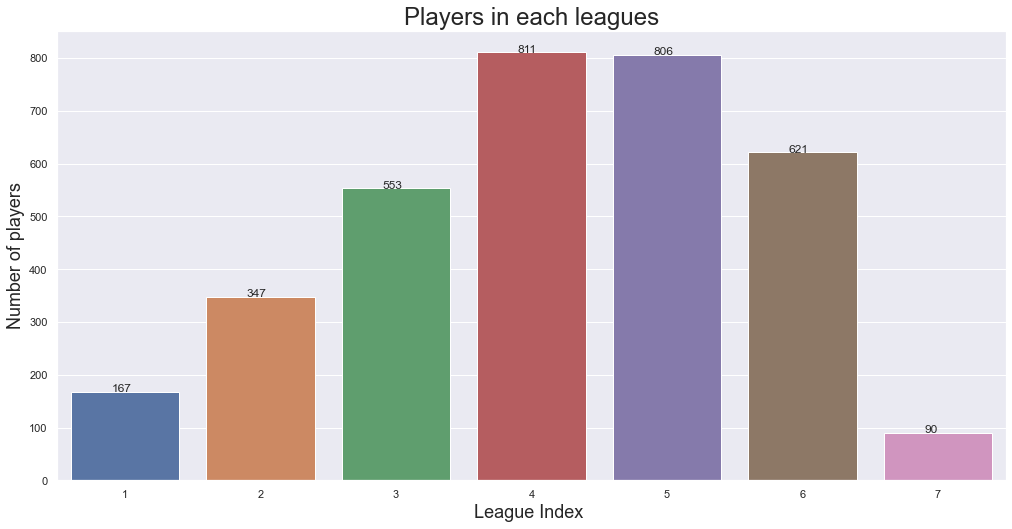

In [16]:
ax = sns.countplot(x="LeagueIndex", data = df_skillcraft)
plt.title("Players in each leagues", fontsize =24)
plt.ylabel('Number of players', fontsize=18)
plt.xlabel('League Index ', fontsize=18)
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.2))

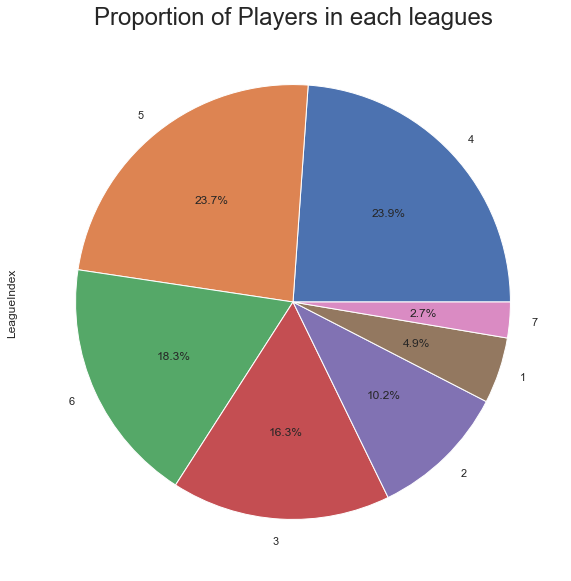

In [17]:
df_skillcraft.LeagueIndex.value_counts().plot(kind="pie",autopct='%1.1f%%',figsize=(10,10))
plt.title("Proportion of Players in each leagues", fontsize =24)
plt.show()

As we can see from the histogram, the distribution is a little right-skewed.
Most of the players of the dataset are between 3rd (Gold) and the 6th (Master) league.
A very few players are in the low leagues (Bronze 1- Silver 2).
The call for Starcraft 2 players was throught online gaming communities and social media. Players the responded with a replay file. So that's surely why there are less lower leagues players in the dataset.
The 7th league (GrandMaster) is the top league, it seems normal that we have less players.

Let's now see the different variables over the different leagues.
We'll see their density. And we also check their outliers with boxplots.

### Age By League

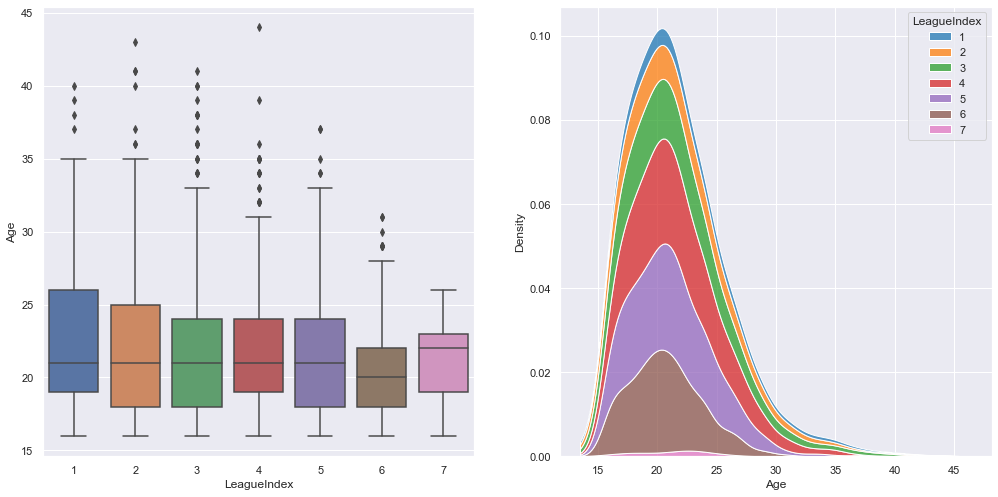

In [18]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'Age', data=df_skillcraft_with_age_and_hours,ax=ax[0])
sns.kdeplot( x='Age', hue='LeagueIndex',data=df_skillcraft_with_age_and_hours,palette="tab10",multiple="stack",ax=ax[1])


Most players are in their 20s.
It seems that Age is rather well evenly distributed between leagues.

### HoursPerWeek By League

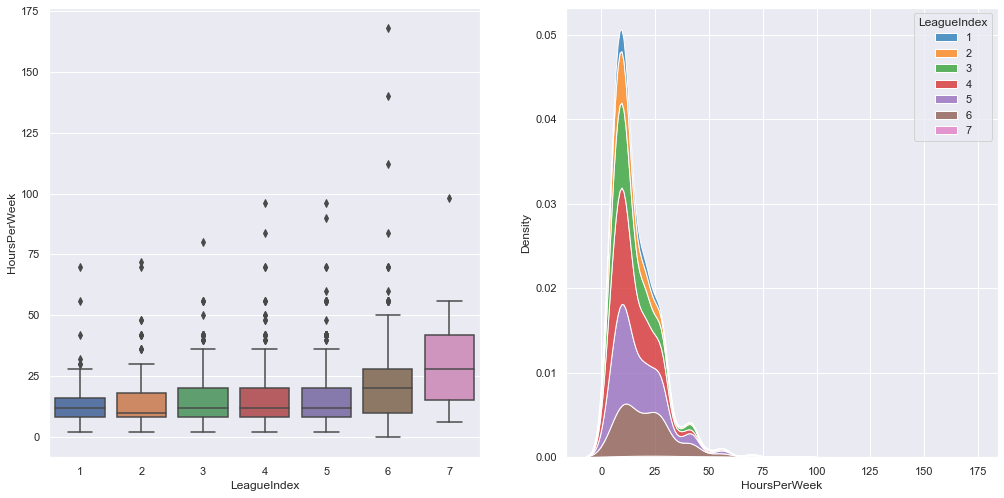

In [18]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'HoursPerWeek', data=df_skillcraft_with_age_and_hours,ax=ax[0])
sns.kdeplot( x='HoursPerWeek', hue='LeagueIndex',data=df_skillcraft_with_age_and_hours,palette="tab10",multiple="stack",ax=ax[1])

Players in higher leagues are playing more ,on average, the game during a week.

### TotalHours By League

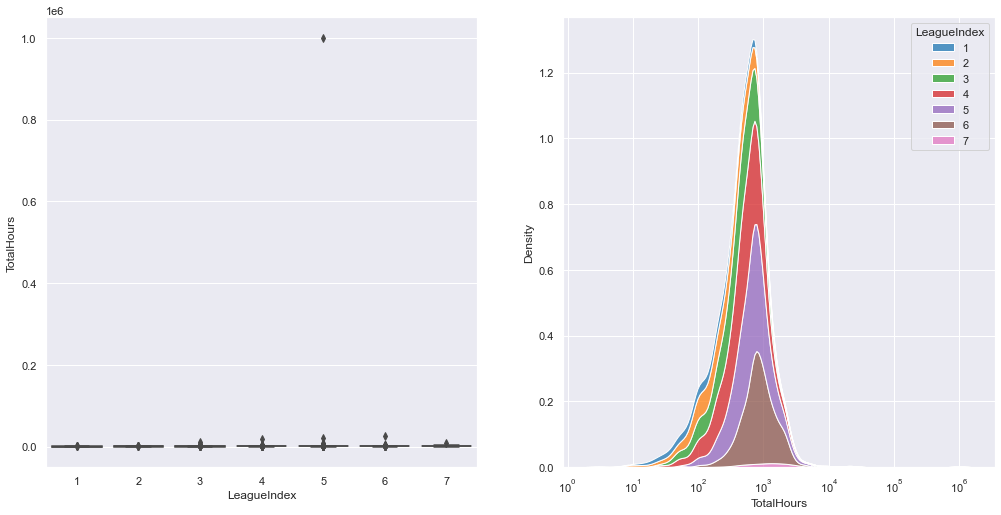

In [19]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'TotalHours', data=df_skillcraft_with_age_and_hours,ax=ax[0])
sns.kdeplot( x='TotalHours', hue='LeagueIndex',data=df_skillcraft_with_age_and_hours,palette="tab10",log_scale=True,multiple="stack",ax=ax[1])

Here there is a issue for the TotalHours variable. On the boxplot, there is an outlier in the league 5.
Below , you can see that there is a player of 18 years old who player for 1000000 hours which is equivalent to 114 years.
So we remove this player

In [20]:
df_skillcraft_with_age_and_hours.sort_values(by="TotalHours",ascending=False)

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1793,5,18,24,1000000,281.4246,0.023428,0.000799,5,0.000041,0.000447,0.005136,28.1164,36.1266,5.8522,29,0.001328,6,0.000000,0.000000
2324,6,20,8,25000,247.0164,0.015794,0.000438,8,0.000308,0.001339,0.004645,17.6471,37.1837,6.5944,29,0.001860,6,0.000000,0.000012
770,5,22,16,20000,248.0490,0.023703,0.000391,7,0.000000,0.000205,0.004651,37.8795,45.3760,4.7560,21,0.001526,6,0.000000,0.000000
1978,4,22,10,18000,152.2374,0.011983,0.000206,1,0.000016,0.000364,0.003351,52.1896,63.9811,4.9575,19,0.000680,5,0.000000,0.000000
2216,3,24,20,10260,76.5852,0.000780,0.000197,0,0.000063,0.000316,0.002438,42.9480,84.6340,5.9107,27,0.000450,10,0.000246,0.000358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2,24,12,10,44.5248,0.001870,0.000152,0,0.000051,0.000126,0.002047,66.3500,97.9259,3.3580,11,0.000606,3,0.000000,0.000000
1502,2,16,10,10,44.9700,0.001562,0.000134,4,0.000000,0.000000,0.001741,156.6234,110.6154,3.8462,18,0.000647,5,0.000000,0.000000
328,2,16,10,10,32.6730,0.001263,0.000111,0,0.000019,0.000056,0.001244,95.8788,119.1642,4.1493,10,0.000854,3,0.000000,0.000000
402,4,16,2,7,111.3582,0.004802,0.000150,0,0.000060,0.000360,0.002551,64.2381,71.8118,6.2000,17,0.001531,4,0.000000,0.000000


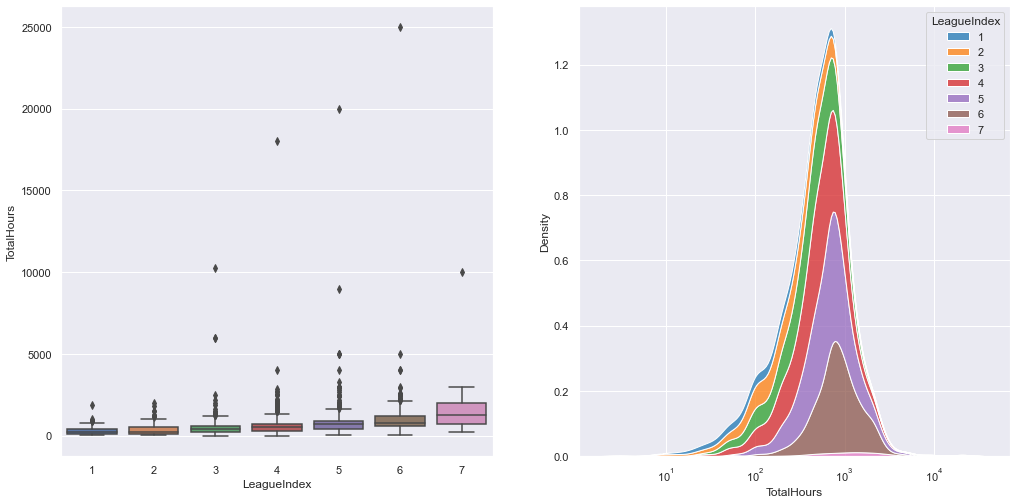

In [21]:
df_skillcraft_with_age_and_hours =df_skillcraft_with_age_and_hours.drop(df_skillcraft_with_age_and_hours[df_skillcraft_with_age_and_hours.TotalHours >87600].index)
#We remove players with more than 10 years of game time to avois these unreasonable values of total hours
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'TotalHours', data=df_skillcraft_with_age_and_hours,ax=ax[0])
sns.kdeplot( x='TotalHours', hue='LeagueIndex',data=df_skillcraft_with_age_and_hours,palette="tab10",multiple="stack",log_scale=True,ax=ax[1])

In [22]:
df_skillcraft_with_age_and_hours.groupby('LeagueIndex').mean().TotalHours

LeagueIndex
1     264.191617
2     331.409222
3     493.792043
4     588.006165
5     781.684932
6     988.405797
7    1581.028571
Name: TotalHours, dtype: float64

On average, players in higher leagues played the game for a longer time than players in lower leagues

### APM By League

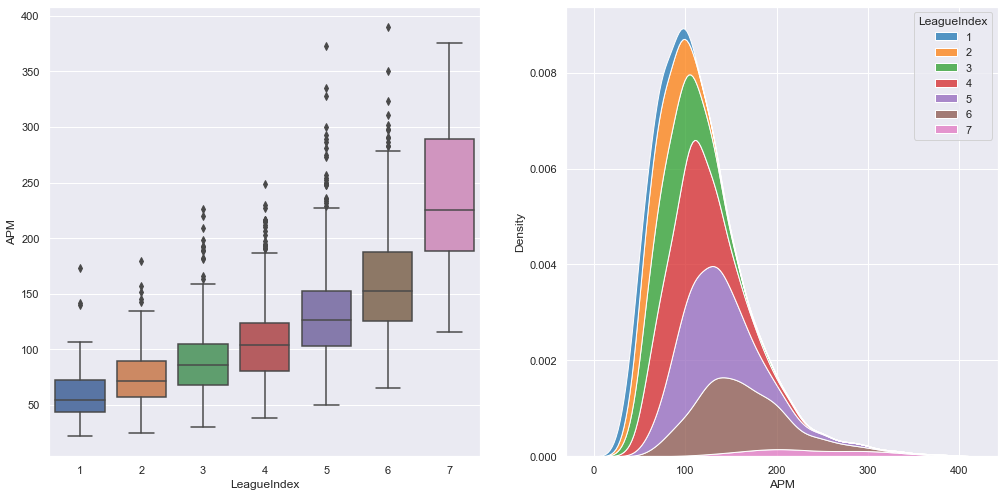

In [23]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'APM', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='APM', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])
#High APM seems to be more present in higher league

We can clearly see that higher leagues player have a higher APM (Actions Per Minute). High APM is often associated with skill, as it can indicate that a player both knows what to do in the game and has the manual dexterity to carry it out.

### SelectByHotkeys By League

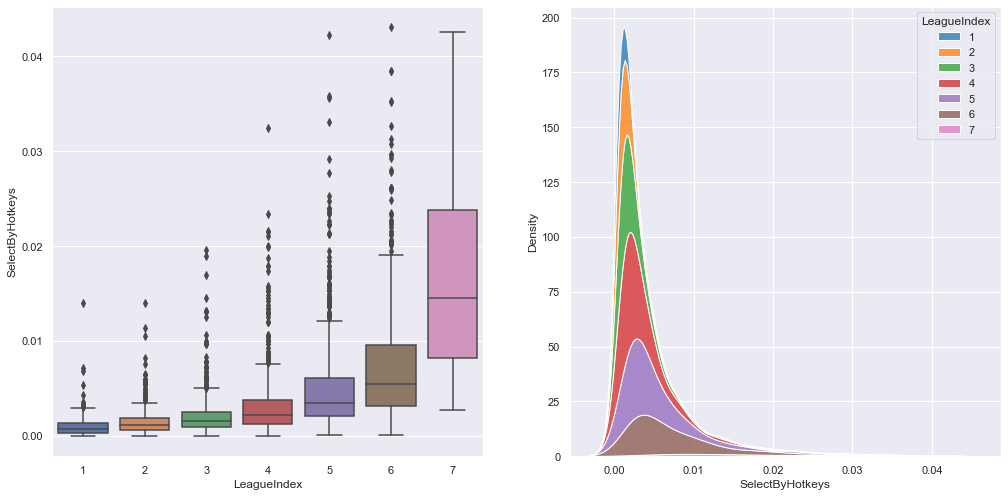

In [24]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'SelectByHotkeys', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='SelectByHotkeys', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

SelectByHotkeys is high in higher leagues and especially in the league 7 where there is a large spike. Hotkeys enable players to do actions in game more rapidly (like selecting and controling their units or building) instead of manual clicking on specific units to the game interface. But it is not intuitive and easy to use that's why lower leagues players tend not to use these hotkeys. Hotkeys indeed necessite practice and muscle memory to use them efficiently.

### AssignToHotkeys By League

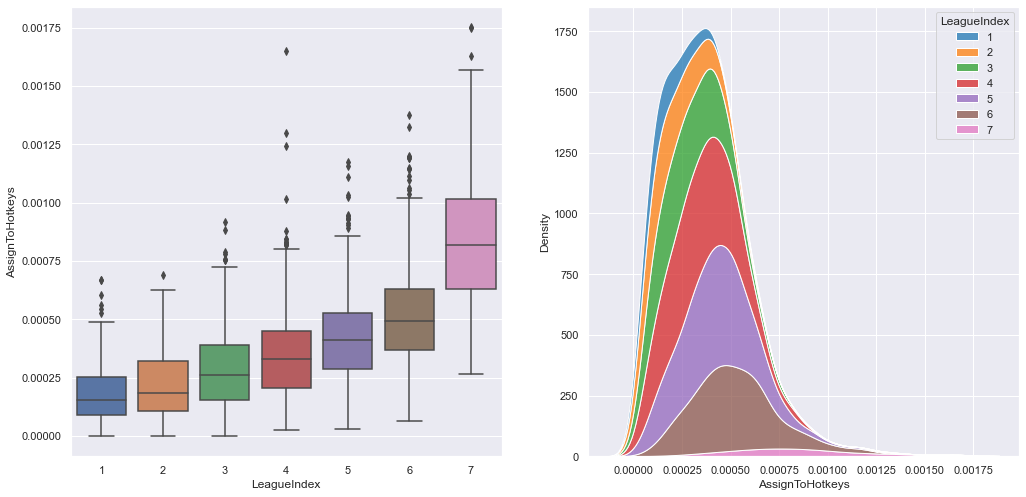

In [25]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'AssignToHotkeys', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='AssignToHotkeys', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

High AssignToHotkeys means that more hotkeys are assigned through the setups but not necessarily more used. Low leagues players still assign some hotkeys. Unsurprisely, higher leagues player have still more hotkeys to do more actions rapidly.

### UniqueHotkeys By League

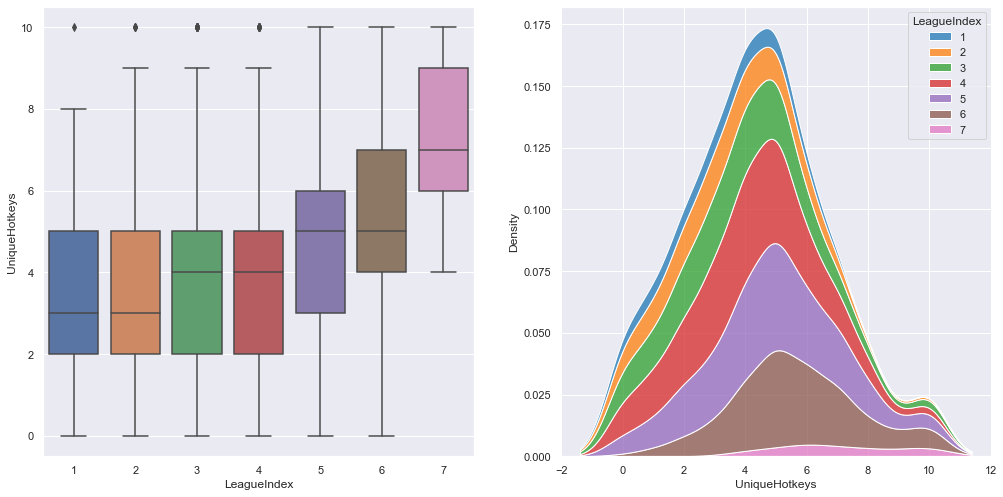

In [26]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'UniqueHotkeys', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='UniqueHotkeys', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

The maximum of unique hotkeys is 10. As always for the hotkeys, higher leagues players use them more.

### MinimapAttacks By League

C:\Users\nicot\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


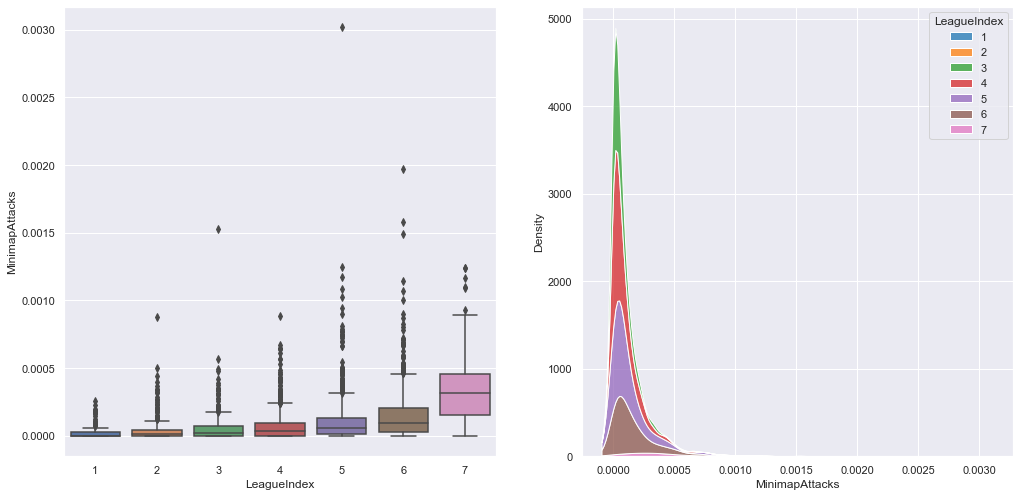

In [27]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'MinimapAttacks', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='MinimapAttacks', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

Higher leagues players seems to attack by clicking on the minimap more , certainly when doing other action at the same time. However it also seems that these attacks on the minimap are not really used much.

### MinimapRightClicks By League

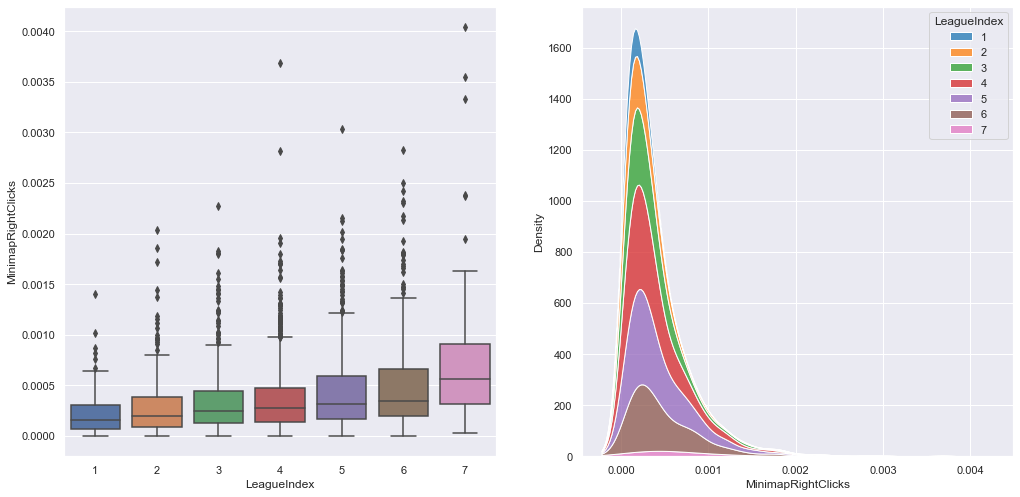

In [28]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'MinimapRightClicks', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='MinimapRightClicks', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

Like MinimapAttacks, right clicks on the minimap are more used in higher leagues (and in general).
These actions with the minimap show the player's ability to multitask.

### NumberOfPACs By League

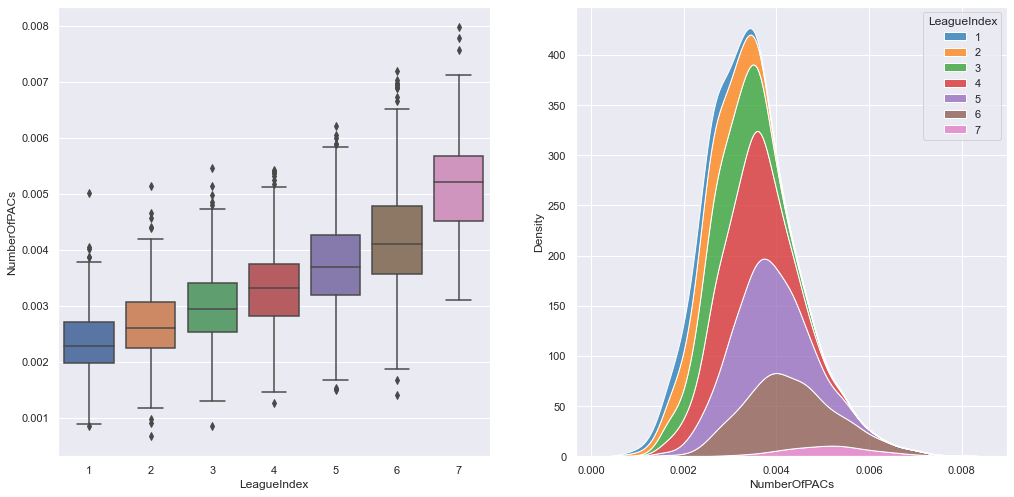

In [29]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'NumberOfPACs', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='NumberOfPACs', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

Perception-Action-Cycles (PACs) describe the ability of a player to move the camera to a location, execute actions and then change the camera to another location. Higher PACs means a faster reaction time to figure out what useful actions need to be done in a certain location. It's normal to find higher PACs in higher leagues.

### GapBetweenPACs By League

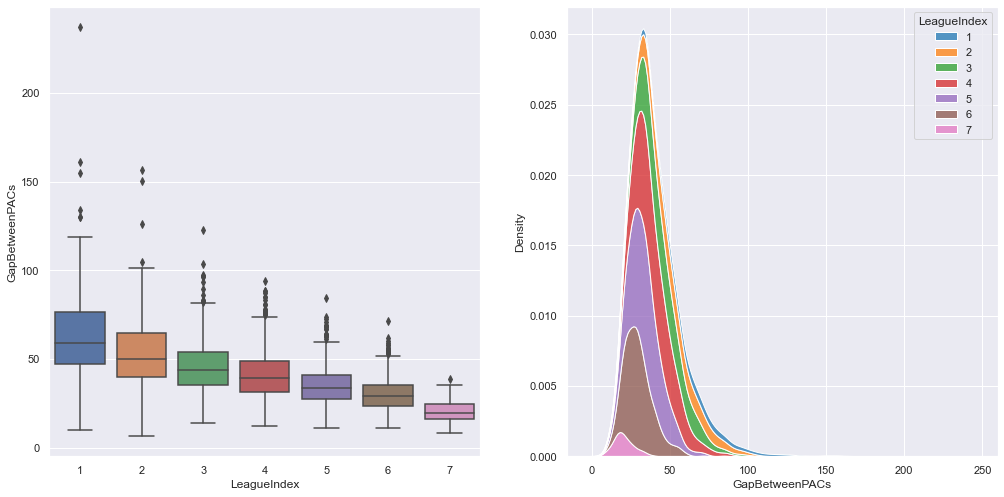

In [30]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'GapBetweenPACs', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='GapBetweenPACs', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

GapBetweenPACs is lower in higher leagues. Shorter gaps means a faster reaction time to do actions in the games and players are taking less time to think on what to do next.

### ActionLatency By League

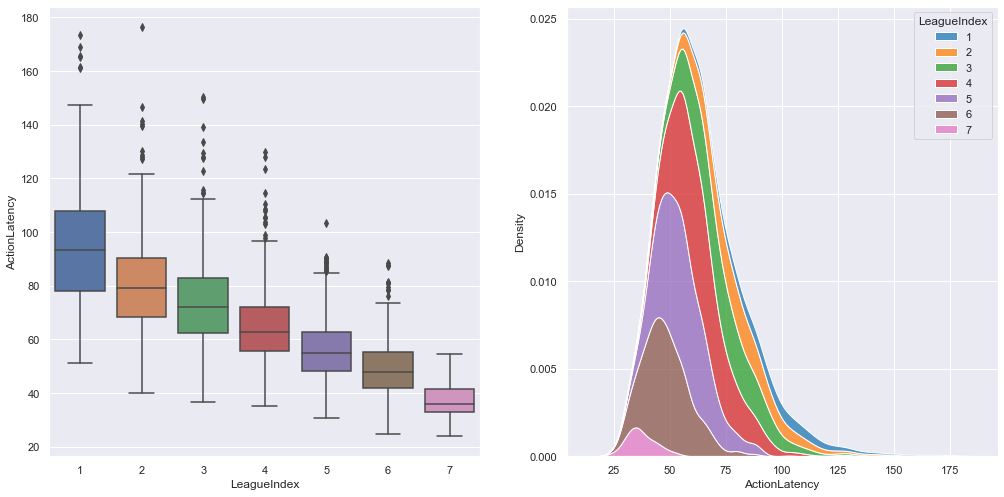

In [31]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'ActionLatency', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='ActionLatency', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

ActionLatency is linked to PACs. A shorter action latency means a faster reaction time, which is found more in players in higer leagues.

### ActionInPAC By League

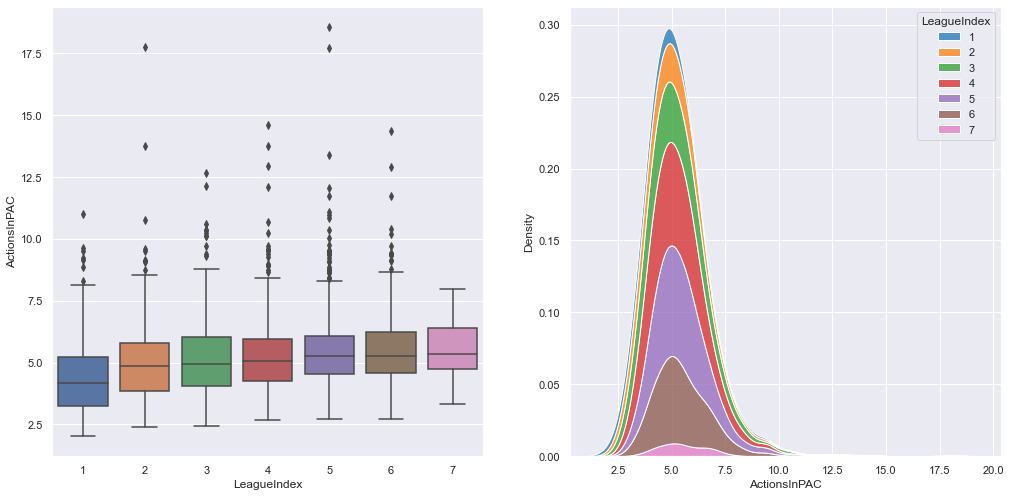

In [32]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'ActionsInPAC', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='ActionsInPAC', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

ActionInPAC is rather well distributed between leagues. This variable seems not as important as the number PACs. A high number of PACs means more actions in more locations, which is mmore useful in game.

### TotalMapExplored By League

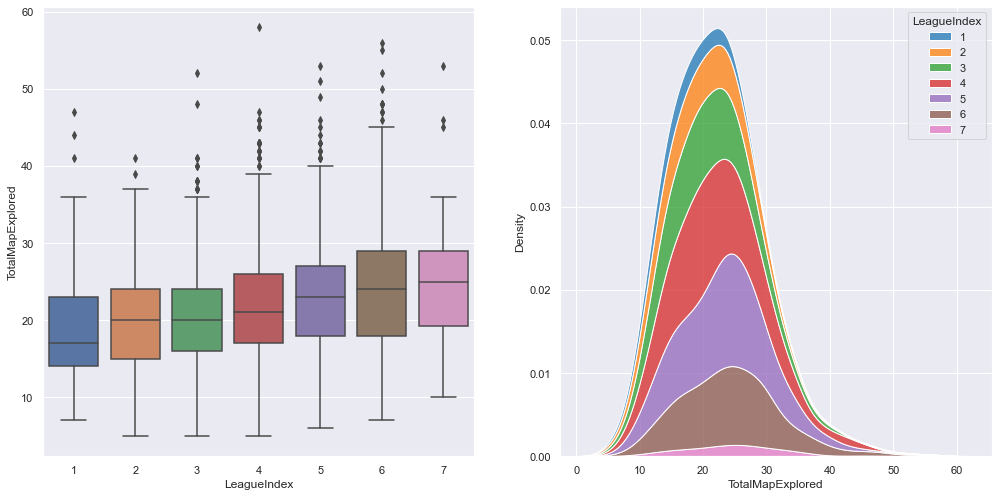

In [33]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'TotalMapExplored', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='TotalMapExplored', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

It seems that TotalMapExplored is not important enough to have an impact on the league index. Even if there is a slight upward trend.

### WorkersMade By League

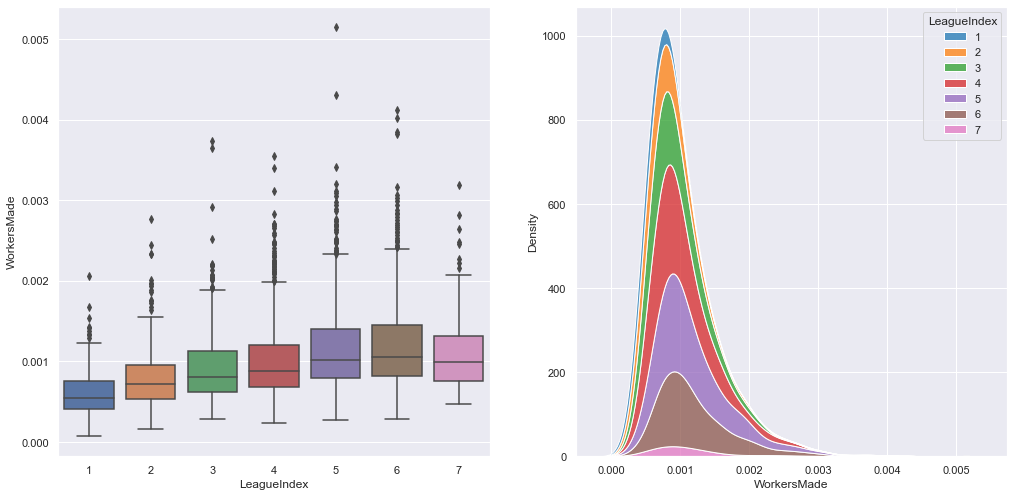

In [34]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'WorkersMade', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='WorkersMade', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

WorkersMade also doesn't seem to have a great importance on league index. The mean of WorkersMade in league 7 is indeed lower than the mean in league 6.

### UniqueUnitsMade By League

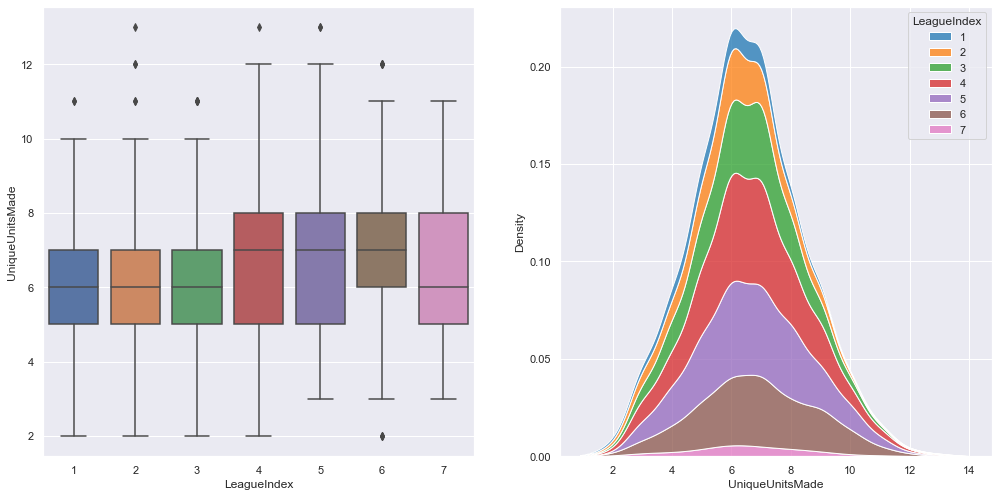

In [35]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'UniqueUnitsMade', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='UniqueUnitsMade', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

UniqueUnitsMade also doesn't seem to have a great importance on league index. It seems that in Starcraft II, there is no garanty to win games by having diverse units.

### ComplexUnitsMade By League

C:\Users\nicot\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


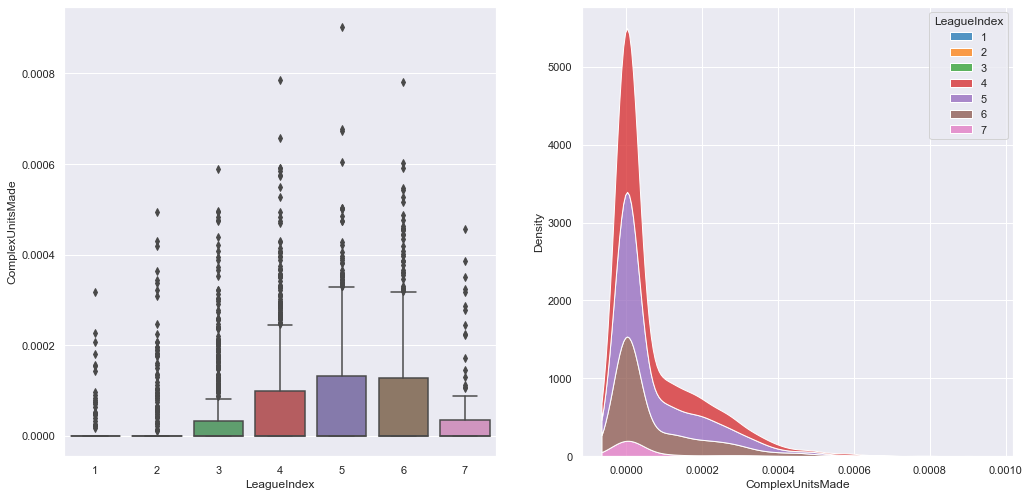

In [36]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'ComplexUnitsMade', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='ComplexUnitsMade', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

ComplexUnitsMade also doesn't seem to have a great importance on league index.

### ComplexAbilitiesUsed By League

C:\Users\nicot\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


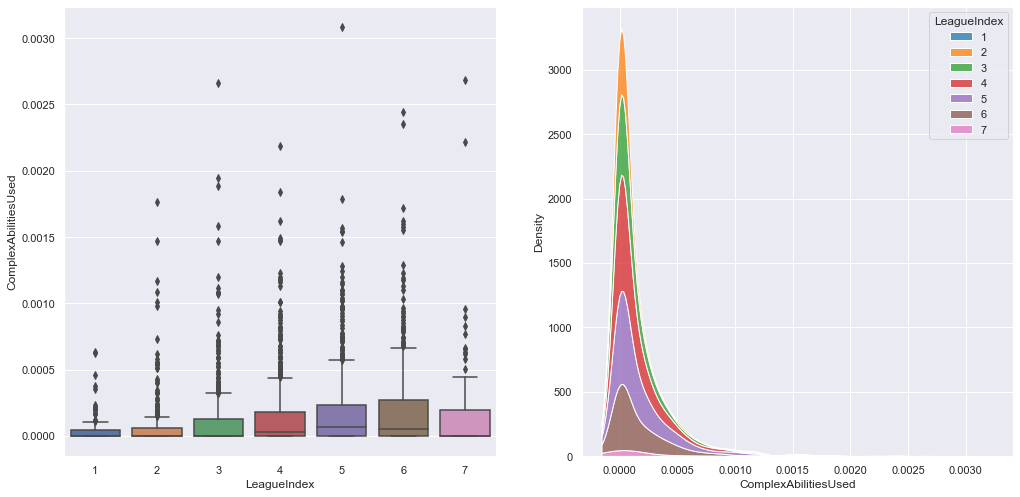

In [37]:
fig, ax =plt.subplots(1,2)
sns.boxplot(x = 'LeagueIndex',y = 'ComplexAbilitiesUsed', data=df_skillcraft,ax=ax[0])
sns.kdeplot( x='ComplexAbilitiesUsed', hue='LeagueIndex',data=df_skillcraft,palette="tab10",multiple="stack",ax=ax[1])

ComplexAbilitiesUsed also doesn't seem to have a great importance on league index.

Finally :

In [19]:
df_skillcraft[df_skillcraft.columns.difference(['LeagueIndex'])].describe()

,APM,ActionLatency,ActionsInPAC,AssignToHotkeys,ComplexAbilitiesUsed,ComplexUnitsMade,GapBetweenPACs,MinimapAttacks,MinimapRightClicks,NumberOfPACs,SelectByHotkeys,TotalMapExplored,UniqueHotkeys,UniqueUnitsMade,WorkersMade
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,117.046947,63.739403,5.272988,0.000374,0.000142,0.000059,40.361562,0.000098,0.000387,0.003463,0.004299,22.131664,4.364654,6.534021,0.001032
std,51.945291,19.238869,1.494835,0.000225,0.000265,0.000111,17.153570,0.000166,0.000377,0.000992,0.005284,7.431719,2.360333,1.857697,0.000519
min,22.059600,24.093600,2.038900,0.000000,0.000000,0.000000,6.666700,0.000000,0.000000,0.000679,0.000000,5.000000,0.000000,2.000000,0.000077
25%,79.900200,50.446600,4.272850,0.000204,0.000000,0.000000,28.957750,0.000000,0.000140,0.002754,0.001258,17.000000,3.000000,5.000000,0.000683
50%,108.010200,60.931800,5.095500,0.000353,0.000020,0.000000,36.723500,0.000040,0.000281,0.003395,0.002500,22.000000,4.000000,6.000000,0.000905
75%,142.790400,73.681300,6.033600,0.000499,0.000181,0.000086,48.290500,0.000119,0.000514,0.004027,0.005133,27.000000,6.000000,8.000000,0.001259
max,389.831400,176.372100,18.558100,0.001752,0.003084,0.000902,237.142900,0.003019,0.004041,0.007971,0.043088,58.000000,10.000000,13.000000,0.005149


#### Lets see correlations of the variables with each other and with the target

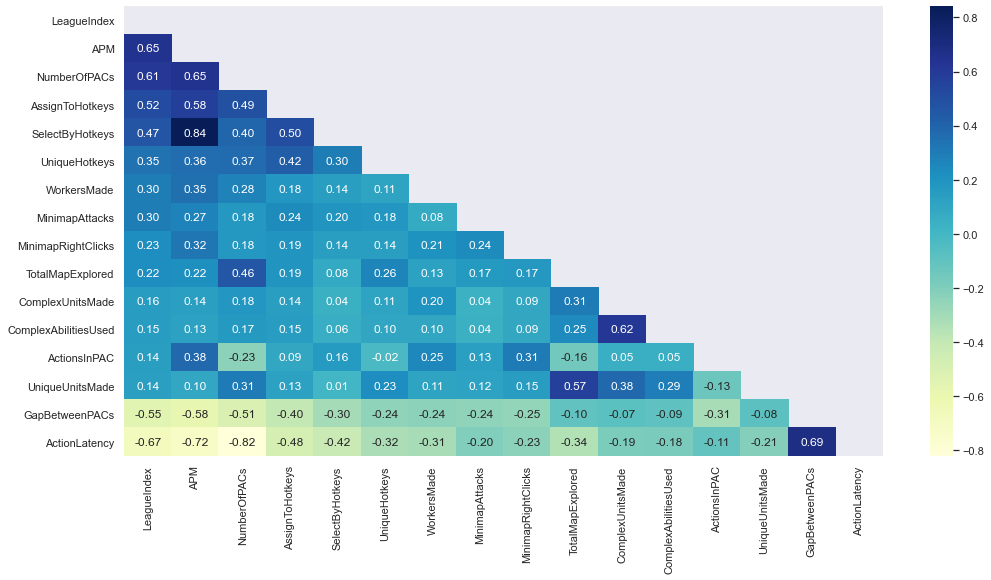

<Figure size 1440x1440 with 0 Axes>

In [39]:
corr = df_skillcraft.corr()
top_corr_cols = corr.LeagueIndex.sort_values(ascending=False).keys() 
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(top_corr, cmap = "YlGnBu",fmt=".2f", annot = True,mask = dropSelf)
plt.figure(figsize=(20, 20))
plt.show()

As we have seen earlier, APM and the variables related to PACs (except ActionsINPAC) are the most features correlated to our target LeagueIndex. Features related to Hotkeys also seems to have a fairly goof correlation with the target.

We can see that APM is highly correlated with SelectByHotkeys and ActionLatency.
ActionLatency is highly correlated with NumberOfPACs.

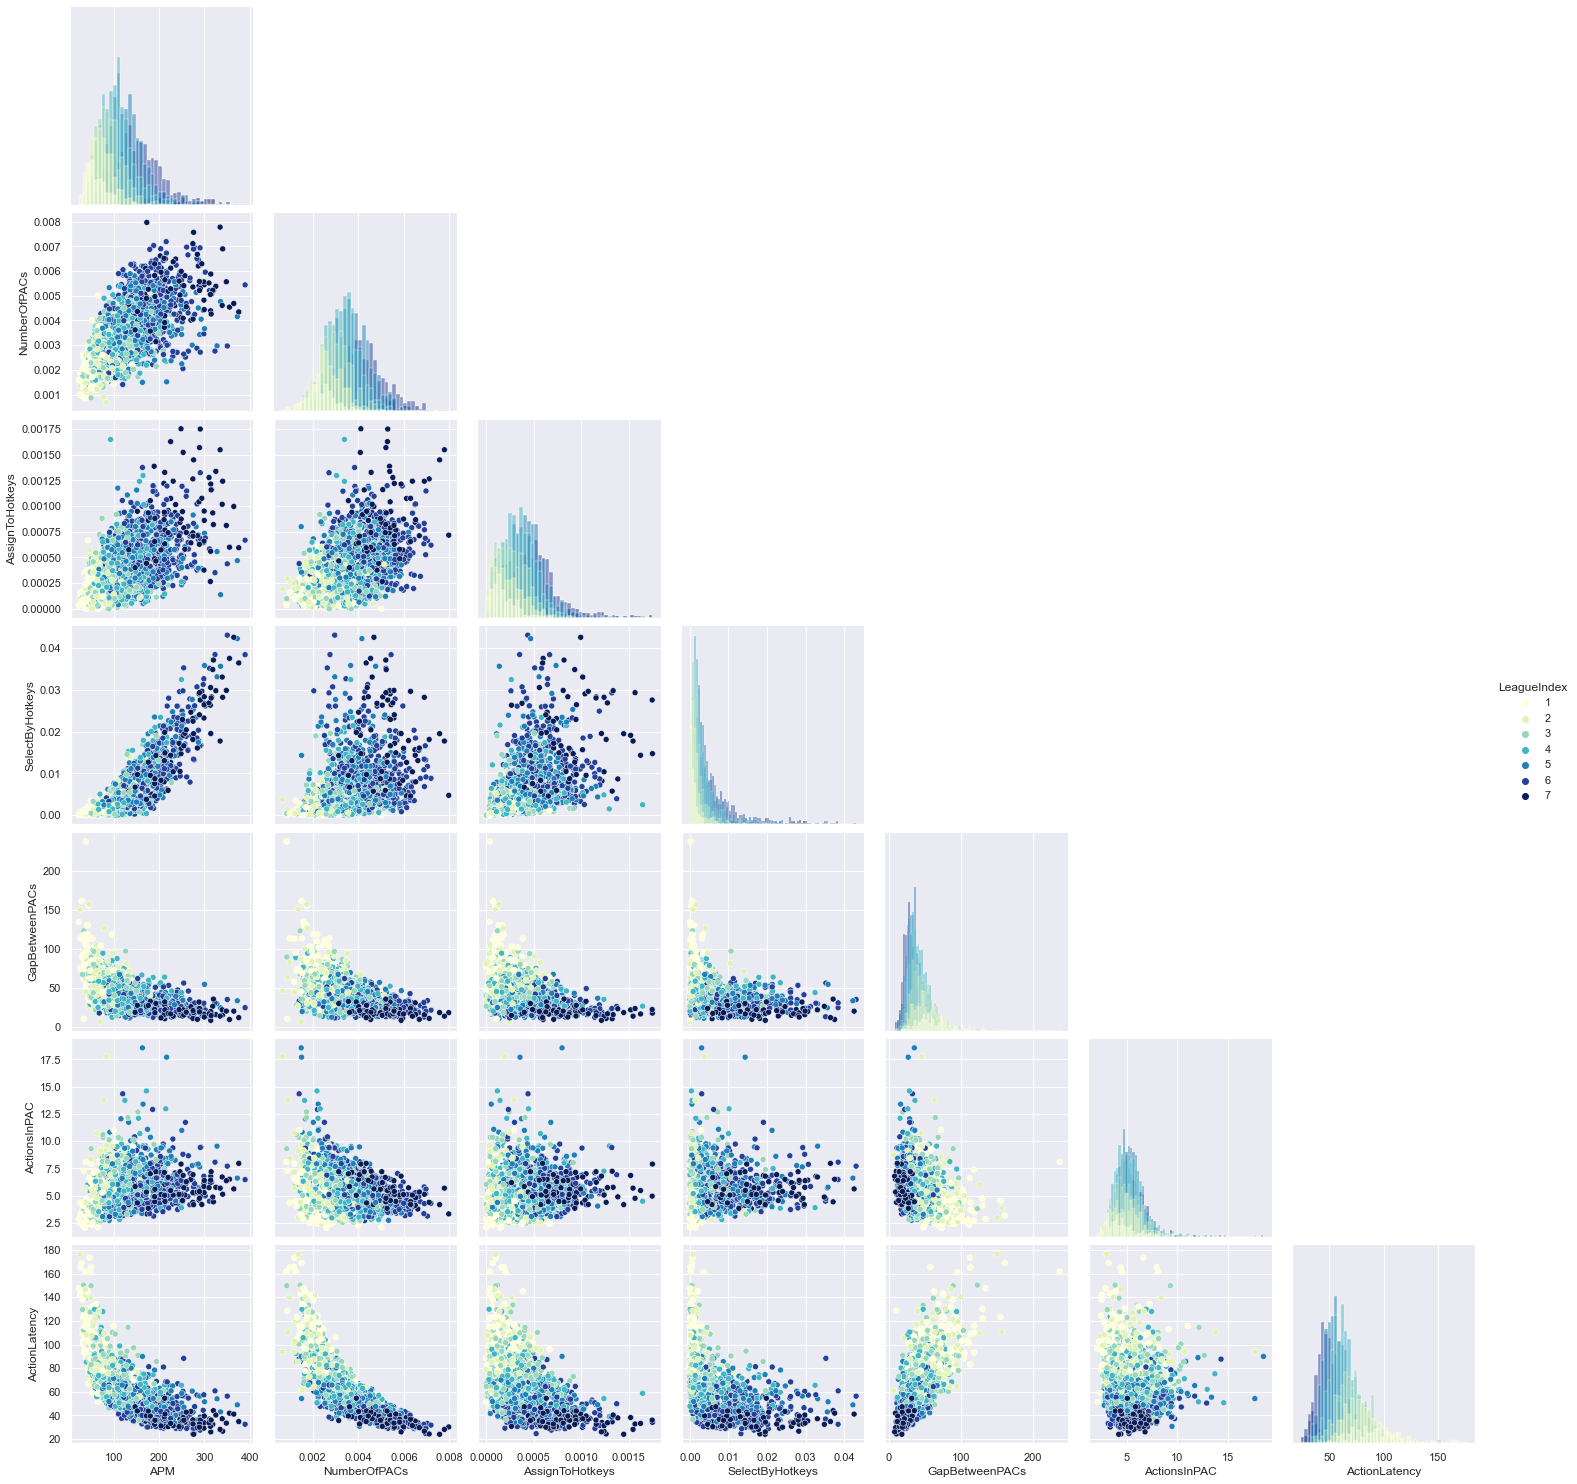

In [40]:
sns.pairplot(df_skillcraft,hue="LeagueIndex",diag_kind = 'hist', height = 3, vars=['APM','NumberOfPACs','AssignToHotkeys','SelectByHotkeys','GapBetweenPACs','ActionsInPAC','ActionLatency'] , palette = 'YlGnBu',corner = True)
#parameters correlated to LeagueIndex

The graph above confirms the correlation between some features.
We can see some kind of linear relation between APM and SelectByHotkeys, an exponential one between ActionLatency and APM, and another one between ActionLatency and NumberOfPACs.

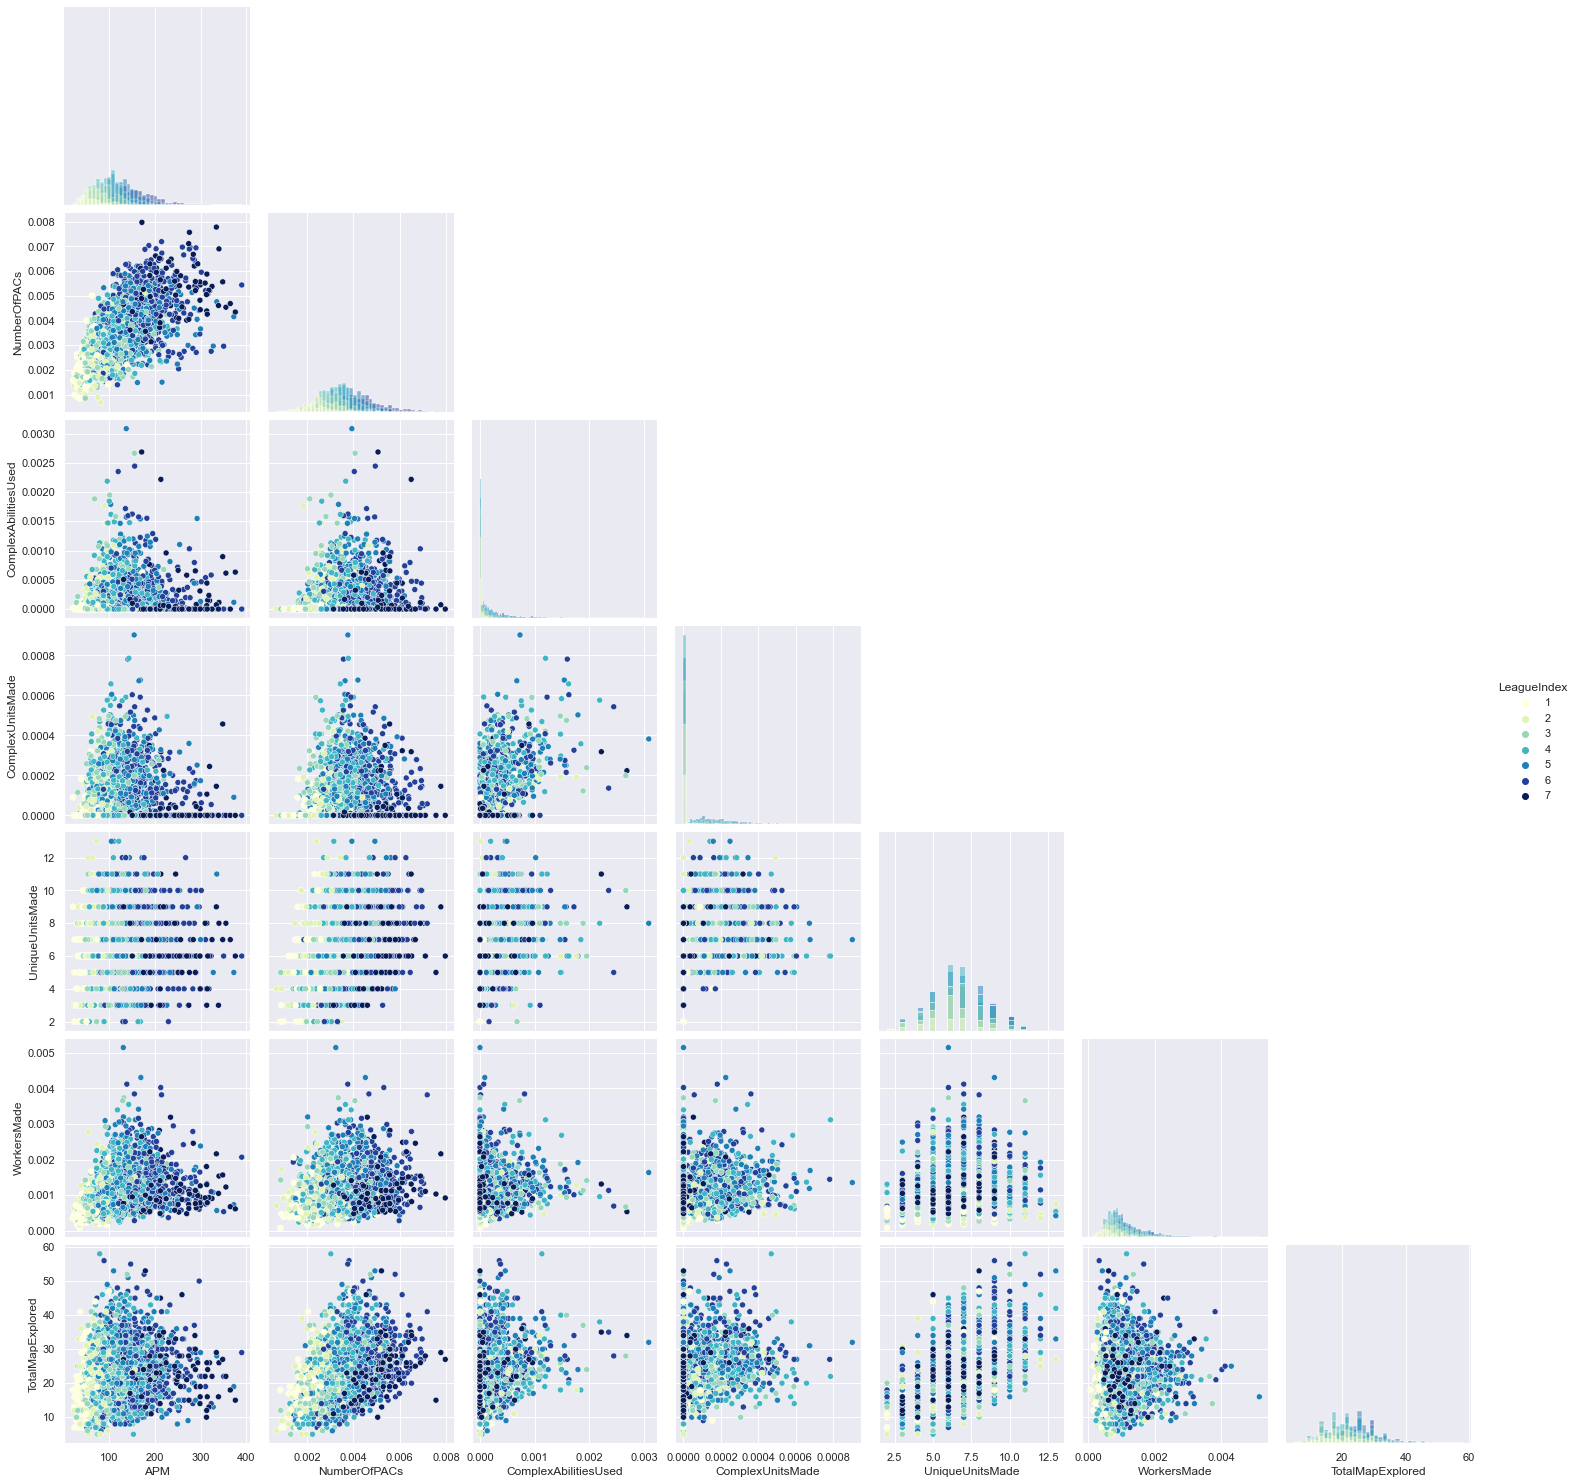

In [41]:
sns.pairplot(df_skillcraft,hue="LeagueIndex",diag_kind = 'hist', height = 3, vars=['APM','NumberOfPACs','ComplexAbilitiesUsed','ComplexUnitsMade','UniqueUnitsMade','WorkersMade','TotalMapExplored'] , palette = 'YlGnBu',corner = True)

# Modelisation

We first split dataset into training set and test set to validate whether our model will generalize well to unseen data.
We fit the model on the training set, we evaluate on the train and above all test set.

In [20]:
y = df_skillcraft.LeagueIndex
X = df_skillcraft.drop(["LeagueIndex"],axis =1)

Normalization of the data because we have many numeric features at different scales.

In [21]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data_norm = scaler.fit_transform(X)
X = pd.DataFrame(data_norm, columns=X.columns)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2716, 15), (679, 15), (2716,), (679,))

Text(0, 0.5, 'Count')

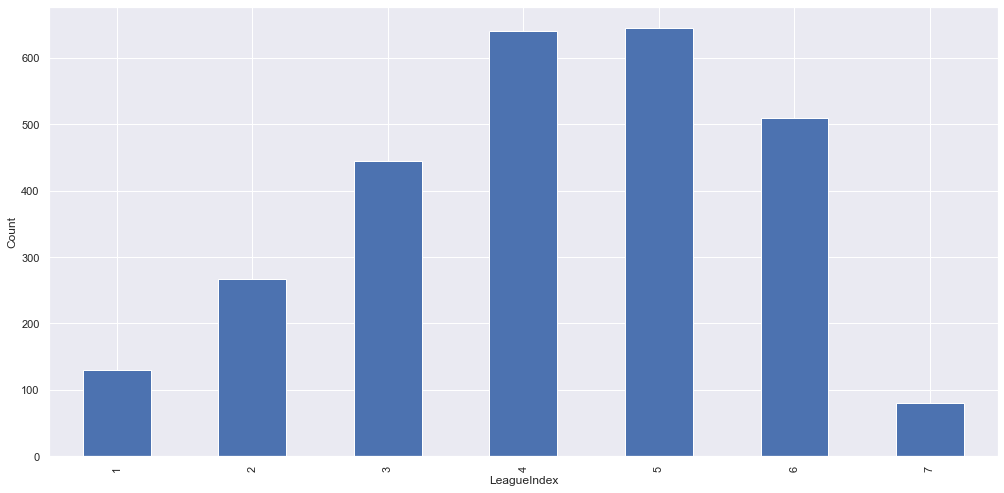

In [23]:
y_train.value_counts().sort_index().plot(kind="bar")
plt.xlabel('LeagueIndex')
plt.ylabel('Count')

Overall It looks like a normal distribution in the training set.

We want to predict league index.
There are 7 league index. It's a classification problem with multiple classes.

For different model, we will do a grid search to obtain the best hyper parameters.
Hyperparameters are different from parameters, which are the internal coefficients or weights for a model found by the learning algorithm. Unlike parameters, hyperparameters are specified by the practitioner when configuring the model.
Typically, it is challenging to know what values to use for the hyperparameters of a given algorithm on a given dataset

### Logistic Regression

On my side, useful differences in performance or convergence with different solvers and also with different C values, which controls the penalty strength. So we decided to use these 2 hyper parameters for the grid search.

In addition, beacause we have a multi-class problem, we can add the hyper parameter "multi_class". With the OvR (One vs rest) scheme, the classifier involves training a single classifier per class, with the samples of that calss as positive sample and all other samples as negatives : a binary problem is fit for each label.

In [168]:
param_grid = {"multi_class":['multinomial','ovr'],"solver":['newton-cg','sag','saga','lbfgs'], "C" : [0.0001,0.001,0.01,0.1,1,10,100,1000], "max_iter":[1000]}
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\nicot\miniconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'C': 100, 'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}

In [24]:
grid.best_score_

NameError: name 'grid' is not defined

In [25]:
lr = LogisticRegression(multi_class='multinomial',C= 1000, max_iter=1000, solver='newton-cg')
lr = lr.fit(X_train, y_train)
lr.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test,y_pred_lr))

              precision    recall  f1-score   support

           1       0.44      0.22      0.29        37
           2       0.29      0.20      0.24        80
           3       0.27      0.21      0.24       109
           4       0.37      0.44      0.40       170
           5       0.43      0.50      0.46       161
           6       0.57      0.64      0.60       112
           7       0.75      0.60      0.67        10

    accuracy                           0.41       679
   macro avg       0.45      0.40      0.41       679
weighted avg       0.40      0.41      0.40       679

0.4108983799705449


### Linear Discriminant Analysis

In [171]:
param_grid = {"solver":['lsqr','eigen','svd'],"shrinkage": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
grid = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicot\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicot\miniconda3\lib\site-pack

C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicot\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicot\miniconda3\lib\site-pack

C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nicot\miniconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nicot\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nicot\miniconda3\lib\site-pack

{'shrinkage': 0.1, 'solver': 'lsqr'}

In [172]:
grid.best_score_

0.39836894702632436

In [26]:
lda =LinearDiscriminantAnalysis(shrinkage=0.1,solver='lsqr')
lda = lda.fit(X_train, y_train)
lda.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_lda = lda.predict(X_test)
print(classification_report(y_test, y_pred_lda))
print(accuracy_score(y_test,y_pred_lda))

              precision    recall  f1-score   support

           1       0.36      0.27      0.31        37
           2       0.29      0.09      0.13        80
           3       0.25      0.21      0.23       109
           4       0.35      0.48      0.40       170
           5       0.43      0.47      0.45       161
           6       0.50      0.51      0.50       112
           7       0.44      0.70      0.54        10

    accuracy                           0.38       679
   macro avg       0.37      0.39      0.37       679
weighted avg       0.37      0.38      0.37       679

0.38291605301914583


### Ridge Clasifier

Ridge clasifier is a linear regression model. One of the most important hyper parameter is "alpha" which is the regularization strength. We also change the solver for the grid search.

In [174]:
param_grid = {"solver":['auto','sparse_cg','sag','saga','lsqr','cholesky','svd'],"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], "max_iter":[1000]}
grid = GridSearchCV(estimator=RidgeClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'alpha': 0.9, 'max_iter': 1000, 'solver': 'sparse_cg'}

In [175]:
grid.best_score_

0.35603130755064455

In [27]:
rc =RidgeClassifier(alpha=1.0, max_iter=1000,solver='lsqr')
rc = rc.fit(X_train, y_train)
rc.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_rc = rc.predict(X_test)
print(classification_report(y_test, y_pred_rc))
print(accuracy_score(y_test,y_pred_rc))

              precision    recall  f1-score   support

           1       0.33      0.03      0.05        37
           2       0.25      0.03      0.05        80
           3       0.23      0.17      0.20       109
           4       0.32      0.49      0.39       170
           5       0.40      0.40      0.40       161
           6       0.39      0.56      0.46       112
           7       0.00      0.00      0.00        10

    accuracy                           0.34       679
   macro avg       0.27      0.24      0.22       679
weighted avg       0.32      0.34      0.31       679

0.34167893961708395


C:\Users\nicot\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

The most important hyper parameter is obviously "max_features", the number of random features to consider when looking for the best split. "n_estimators", which is the number of trees in the forest is also important.

In [ ]:
param_grid = {"n_estimators" : [10,30,50,70,100,150], "max_features" : np.arange(1,18,1)}
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
grid.best_score_

In [29]:
#Random forest
rf =RandomForestClassifier(max_features=3,n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       0.36      0.22      0.27        37
           2       0.40      0.26      0.32        80
           3       0.28      0.28      0.28       109
           4       0.32      0.37      0.35       170
           5       0.37      0.38      0.38       161
           6       0.48      0.57      0.52       112
           7       1.00      0.40      0.57        10

    accuracy                           0.37       679
   macro avg       0.46      0.35      0.38       679
weighted avg       0.37      0.37      0.37       679

0.3696612665684831


### Decision Tree

In [ ]:
param_grid = {"criterion" :["gini", "entropy"], "max_features" : np.arange(1,18,1)}
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
grid.best_score_

In [30]:
#Decision forest
dt =DecisionTreeClassifier(max_features=11, criterion='entropy')
dt = dt.fit(X_train, y_train)
dt.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           1       0.29      0.22      0.25        37
           2       0.30      0.21      0.25        80
           3       0.24      0.26      0.25       109
           4       0.27      0.28      0.28       170
           5       0.32      0.33      0.32       161
           6       0.35      0.38      0.37       112
           7       0.31      0.40      0.35        10

    accuracy                           0.30       679
   macro avg       0.30      0.30      0.29       679
weighted avg       0.30      0.30      0.29       679

0.2960235640648012


### Gradient Boosting Machine

In [ ]:
"learning_rate" deterlines the impact of each tree on the final outcome.
"n_estimators" is the number of sequential trees to be modeled.

In [ ]:
#Gradient Boosting Machine
param_grid = {"n_estimators" : [10,30,50,70,100,150], "learning_rate" : [0.001, 0.01, 0.1]}
grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
grid.best_score_

In [31]:
gb =GradientBoostingClassifier(learning_rate=0.1,n_estimators=150)
gb = gb.fit(X_train, y_train)
gb.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))
print(accuracy_score(y_test,y_pred_gb))

              precision    recall  f1-score   support

           1       0.44      0.32      0.38        37
           2       0.44      0.26      0.33        80
           3       0.27      0.29      0.28       109
           4       0.32      0.32      0.32       170
           5       0.39      0.43      0.41       161
           6       0.44      0.51      0.47       112
           7       0.50      0.40      0.44        10

    accuracy                           0.37       679
   macro avg       0.40      0.36      0.38       679
weighted avg       0.37      0.37      0.37       679

0.36818851251840945


### SVC

The hyper parameter "kernel" changes the manner in which input varaibles will be projected. 
The penalty "C" is again an important hyper parameter.

In [ ]:
param_grid = {"C" : [1000,100, 10, 1.0, 0.1, 0.001], "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
grid.best_score_

In [32]:
svc =SVC(C=10,kernel='linear')
svc = svc.fit(X_train, y_train)
svc.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))
print(accuracy_score(y_test,y_pred_svc))

              precision    recall  f1-score   support

           1       0.27      0.08      0.12        37
           2       0.37      0.14      0.20        80
           3       0.24      0.21      0.23       109
           4       0.34      0.47      0.40       170
           5       0.41      0.49      0.45       161
           6       0.54      0.54      0.54       112
           7       0.75      0.60      0.67        10

    accuracy                           0.39       679
   macro avg       0.42      0.36      0.37       679
weighted avg       0.38      0.39      0.37       679

0.3858615611192931


### KNN

In [ ]:
param_grid = {"n_neighbors" : np.arange(1,21,1), "metric" : [ 'euclidean','manhattan', 'minkowski'],"weights" : ['uniform','distance']}
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
grid.best_score_

In [33]:
knn =KNeighborsClassifier(metric='manhattan', n_neighbors = 20, weights='distance')
knn = knn.fit(X_train, y_train)
knn.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.59      0.27      0.37        37
           2       0.46      0.26      0.33        80
           3       0.22      0.24      0.23       109
           4       0.31      0.39      0.35       170
           5       0.38      0.33      0.35       161
           6       0.39      0.49      0.43       112
           7       0.67      0.20      0.31        10

    accuracy                           0.34       679
   macro avg       0.43      0.31      0.34       679
weighted avg       0.36      0.34      0.34       679

0.3431516936671576


### Bagging

"n_estimators" is the number of trees and is an important hyper parameters.

In [ ]:
#Bagged decision trees(bagging)
param_grid = {"n_estimators" : [10, 30, 50, 70, 100]}
grid = GridSearchCV(estimator=BaggingClassifier(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

In [ ]:
grid.best_score_

In [34]:
bag =BaggingClassifier(n_estimators=30)
bag = bag.fit(X_train, y_train)
bag.score(X_train, y_train) #the coefficient of determinationR^2 of the prediction
y_pred_bag = bag.predict(X_test)
print(classification_report(y_test, y_pred_bag))
print(accuracy_score(y_test,y_pred_bag))

              precision    recall  f1-score   support

           1       0.31      0.24      0.27        37
           2       0.44      0.29      0.35        80
           3       0.25      0.25      0.25       109
           4       0.32      0.37      0.34       170
           5       0.39      0.38      0.38       161
           6       0.46      0.53      0.49       112
           7       0.60      0.30      0.40        10

    accuracy                           0.36       679
   macro avg       0.39      0.34      0.36       679
weighted avg       0.36      0.36      0.36       679

0.36082474226804123


Lets compare all these models.

In [36]:
models = []
models.append(('LR', lr))
models.append(('Bagging', bag))
models.append(('KNN', knn))
models.append(('Decision Tree', dt))
models.append(('Gradient Boosting', gb))
models.append(('SVC', svc))
models.append(('Random Forest',rf))
models.append(('LDA',lda))

We will try these models on different training and test sets.

In [37]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.398824 (0.030193)
Bagging: 0.384966 (0.020245)
KNN: 0.360240 (0.017628)
Decision Tree: 0.322521 (0.020972)
Gradient Boosting: 0.377939 (0.028907)
SVC: 0.397029 (0.040528)
Random Forest: 0.394121 (0.020610)
LDA: 0.389992 (0.027649)


Above are the mean accuracy and the standard deviation accuracy for each model.

Below is a boxplot showing the spread of the accuracy scores across each cross-validation fold for each model.

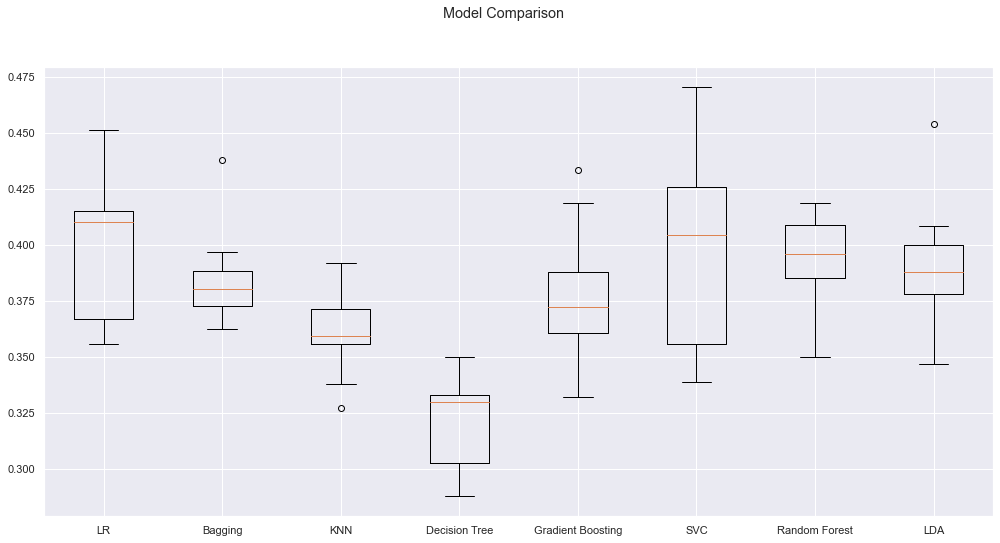

In [38]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From these results, it would suggest that Logistic Regression and SVC are perhaps worthy of further study on this problem.

In [40]:
max_values =[]
for array in results:
    max_values.append(np.amax(array))
max_values
d ={'Model': names, 'Max mean accuracy': max_values}
df = pd.DataFrame(d)
df = df.sort_values('Max mean accuracy',ascending = False)
df

,Model,Max mean accuracy
5,SVC,0.470588
7,LDA,0.454277
0,LR,0.451327
1,Bagging,0.438235
4,Gradient Boosting,0.433628
6,Random Forest,0.418879
2,KNN,0.392330
3,Decision Tree,0.350000


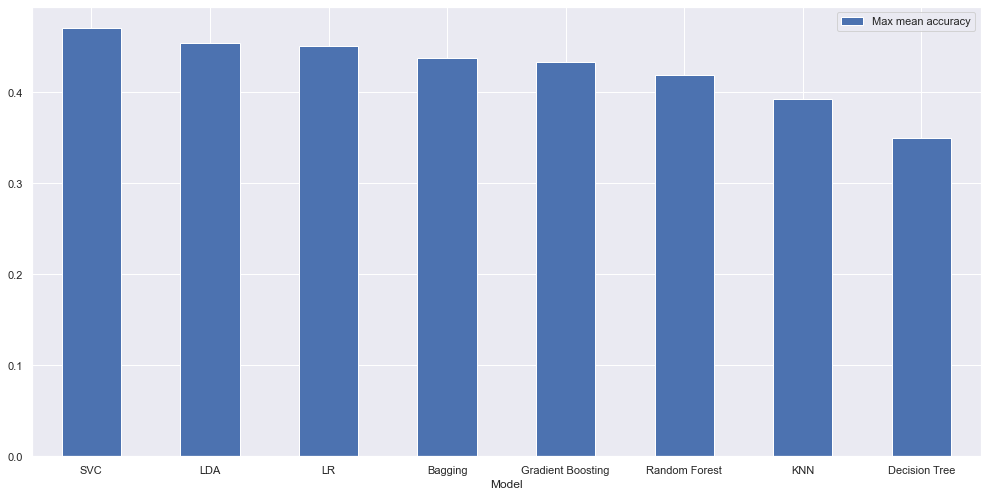

In [41]:
df.plot.bar(x='Model', y='Max mean accuracy', rot=0)

We create a joblib of our model Logistic Regression for our API Flask.

In [43]:
with open("flask_api/final_model.joblib", "wb") as f:
    joblib.dump(lr, f)